# Heart Failure Prediction

## 1. Problem Statement: 
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In this project, we seek to classify patients by risk of heart failure depending on their specific lifestyle factors. This will be binary classification problem. 

### Goal
- Determine if a patient is prone to heart failure depending on various features. 

### Dataset Attributes
- Age : age of the patient [years]
- Sex : sex of the patient [M: Male, F: Female]
- ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP : resting blood pressure [mm Hg]
- Cholesterol : serum cholesterol [mm/dl]
- FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
- Oldpeak : oldpeak = ST [Numeric value measured in depression]
- ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease : output class [1: heart disease, 0: Normal]


## 2. EDA

In [11]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [13]:
df.shape

(918, 12)

In [14]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


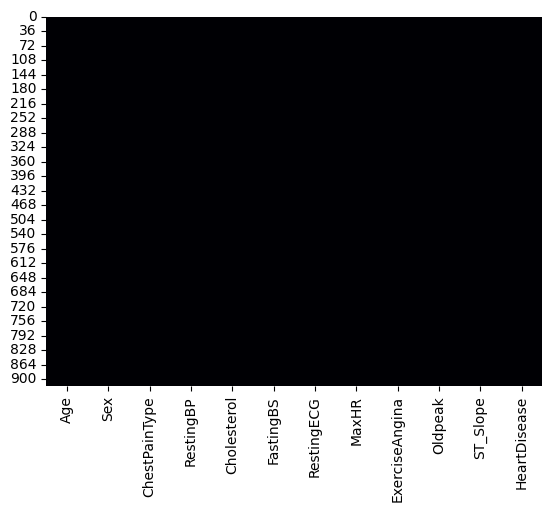

In [6]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

this displays that we have no null values

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


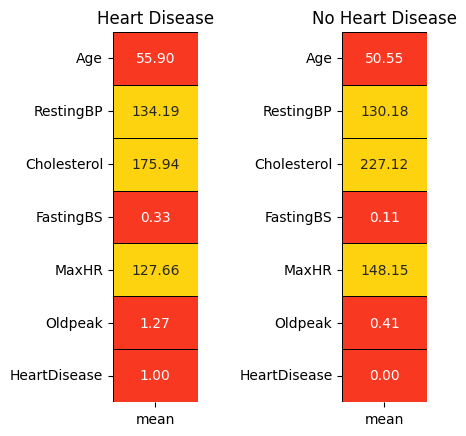

In [44]:
hd_pos = df[df['HeartDisease'] == 1].describe().T
hd_neg = df[df['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

#Displayed mean values within each subgroup (has HD vs no HD)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(hd_pos[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(hd_neg[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad=3)
plt.savefig('meansacrossdisease.pdf')

In [9]:
#Divide Numerical and Categorical Variables

col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


### Categorical Feature Analysis

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Deep Copy to use categorical vars in viz and model purposes
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

#### Distribution of Categorical Features

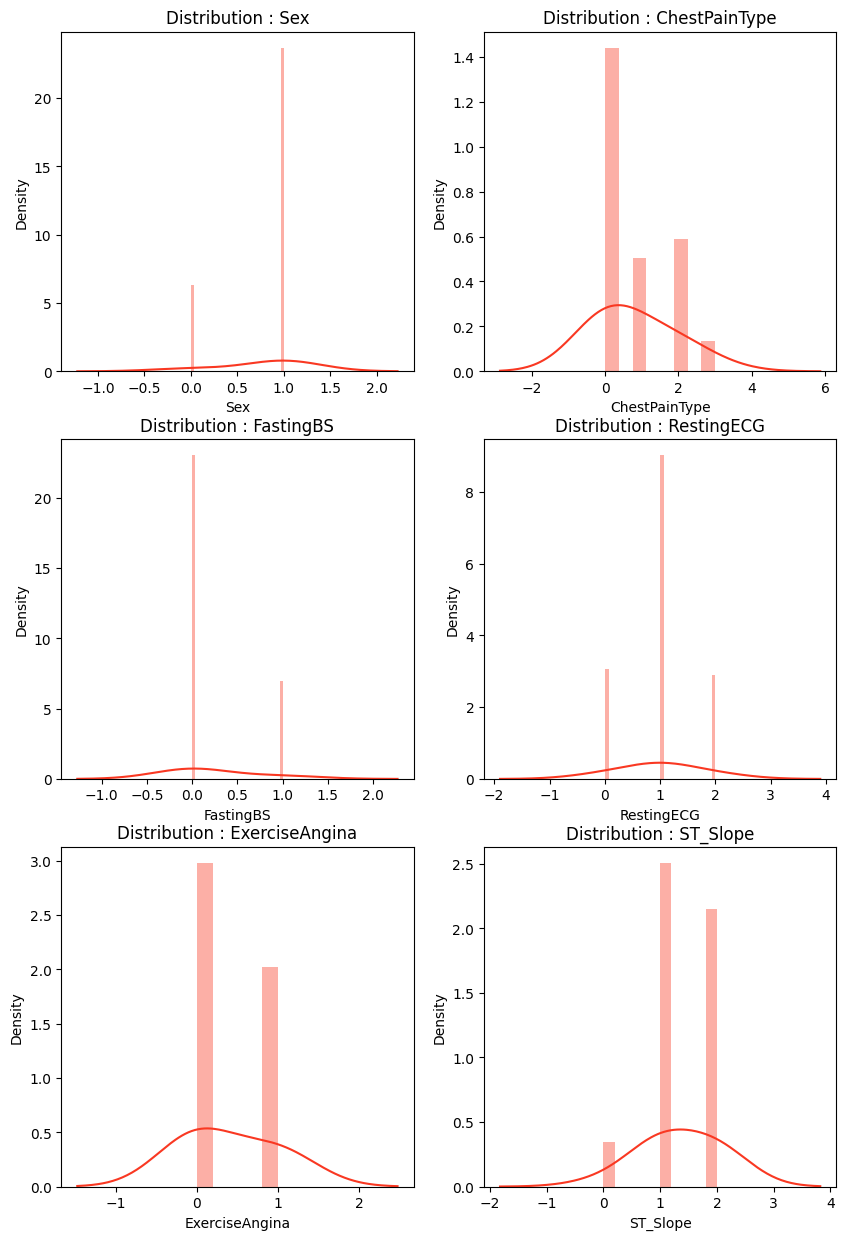

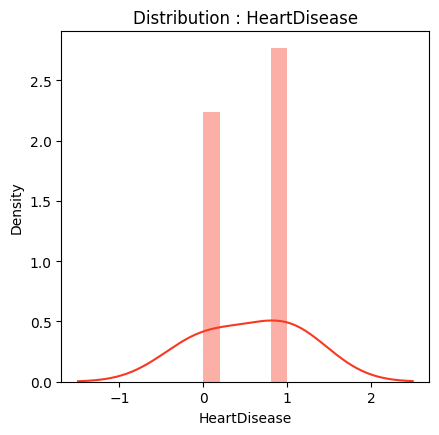

In [45]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);
plt.savefig('distrCateg.pdf')

We see that all of the distributions within the data are normally distributed

### Numerical Feature Analysis

#### Distribution Analysis

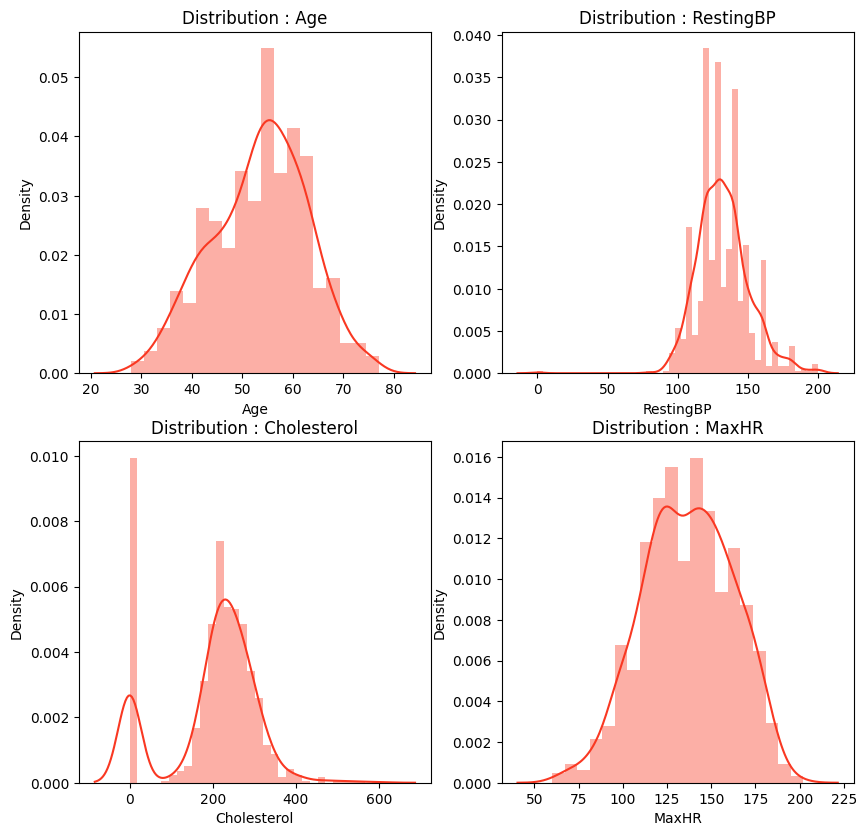

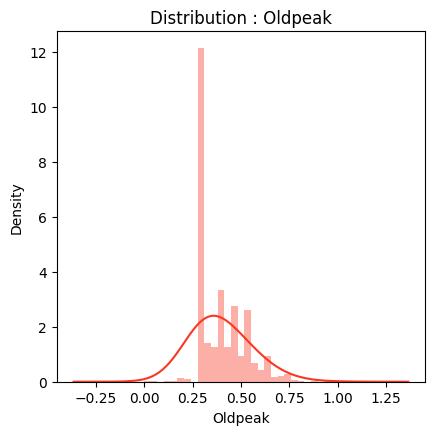

In [46]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);
plt.savefig('distrNum.pdf')

### Target Variable Visualization

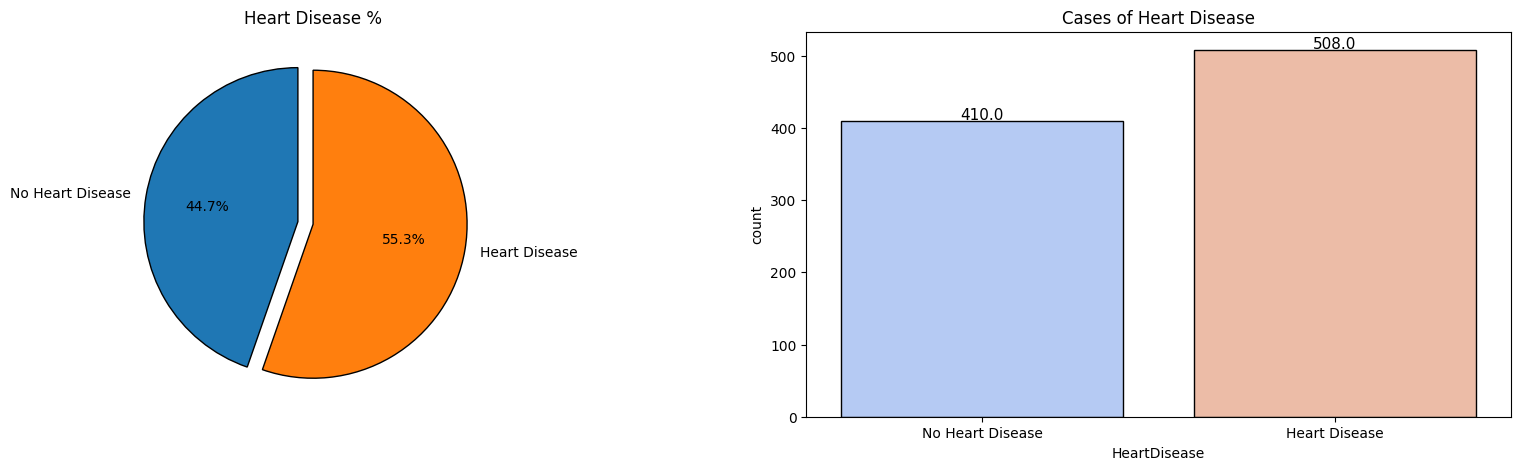

<Figure size 640x480 with 0 Axes>

In [47]:
l = list(df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease',data= df,palette= 'coolwarm',edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()
plt.savefig('HDPercent.pdf')

Here we see that the data/cases of HD+ vs HD- is somewhat even (via eyeball)

#### Categorical vs HD

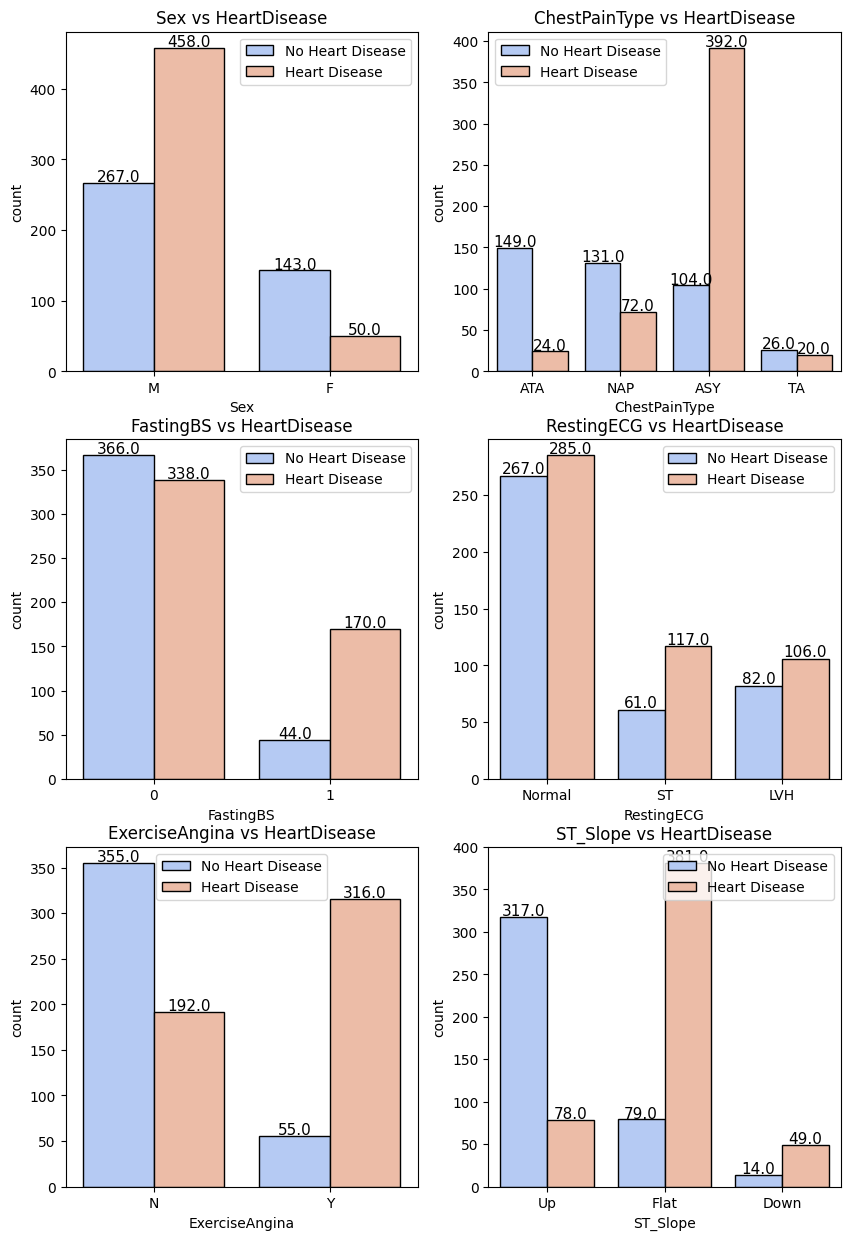

In [49]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=categorical_features[i],data = df,hue = "HeartDisease",palette = 'coolwarm',edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);
    plt.savefig('categorical+HD ' + str(i) +'.pdf')

##### Observations
- Male population more HD+ patients than HD-. In the female case, HD+ < HD-.
- ASY is most common chest pain type in HD+ patients.
- Patients with and w/o FastingBS are HD+.
- RestingECG does not clearly categorize between HD+ and HD-.
- Exercise Induced Engina presence features more cases with HD. 
- ST_Slope analysis displays flat slope has high probability of HD+ diagnosis. Down slope also features higher proportion of HD+ than HD-, but not as many cases shown. 


### Categorical in HD+ Cases

In [15]:
#Sex Analysis
sex = df[df['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

#ChestPain
cp = df[df['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

#FastBS
fbs = df[df['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

#RestEXG
restecg = df[df['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

#ExAngia
exang = df[df['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

#ST_Slope
slope = df[df['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

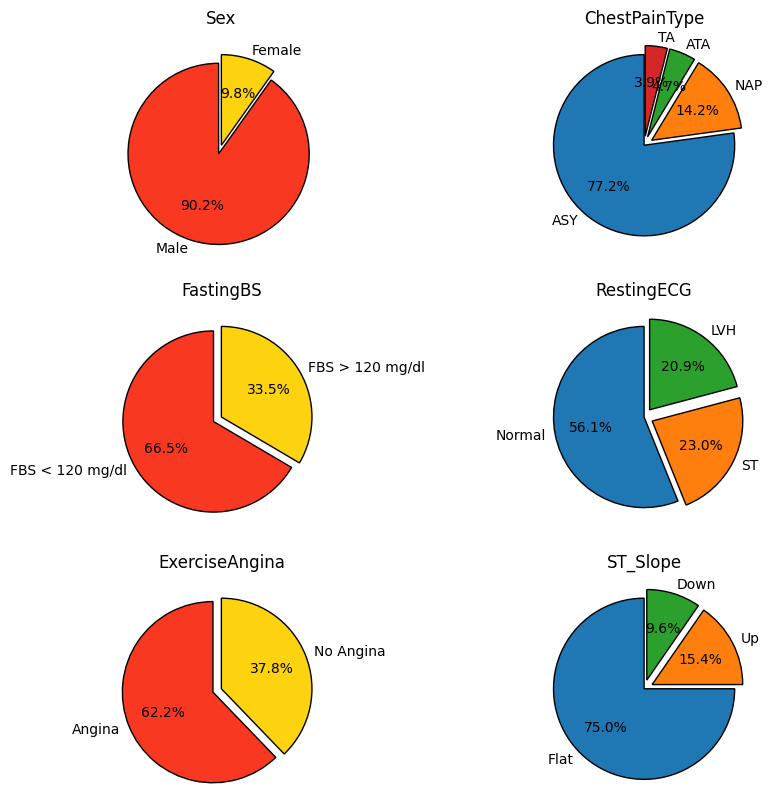

In [52]:
#Plot categorical analysis findings
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (10,10))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');
plt.savefig('HD+vsSex.pdf')

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');
plt.savefig('HD+vsCPT.pdf')


plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');
plt.savefig('HD+vsFBS.pdf')


plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');
plt.savefig('HD+vsRECG.pdf')


plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');
plt.savefig('HD+vsEA.pdf')


plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');
plt.savefig('HD+vsST.pdf')


#### Observations
- Important to note that 90% of HD+ is Male. This could potentially sway the factors that model is swayed (model could weigh sex feature higher towards HD+ due to data distribution)
- When it comes to chest pain, ASY type is 72% of data within HD+
- FBS < 120 displays high chance of HD+
- ST_Slope as Flat is 75% which may assist in detecting underlying heart problems.

### Numerical vs Heart Disease

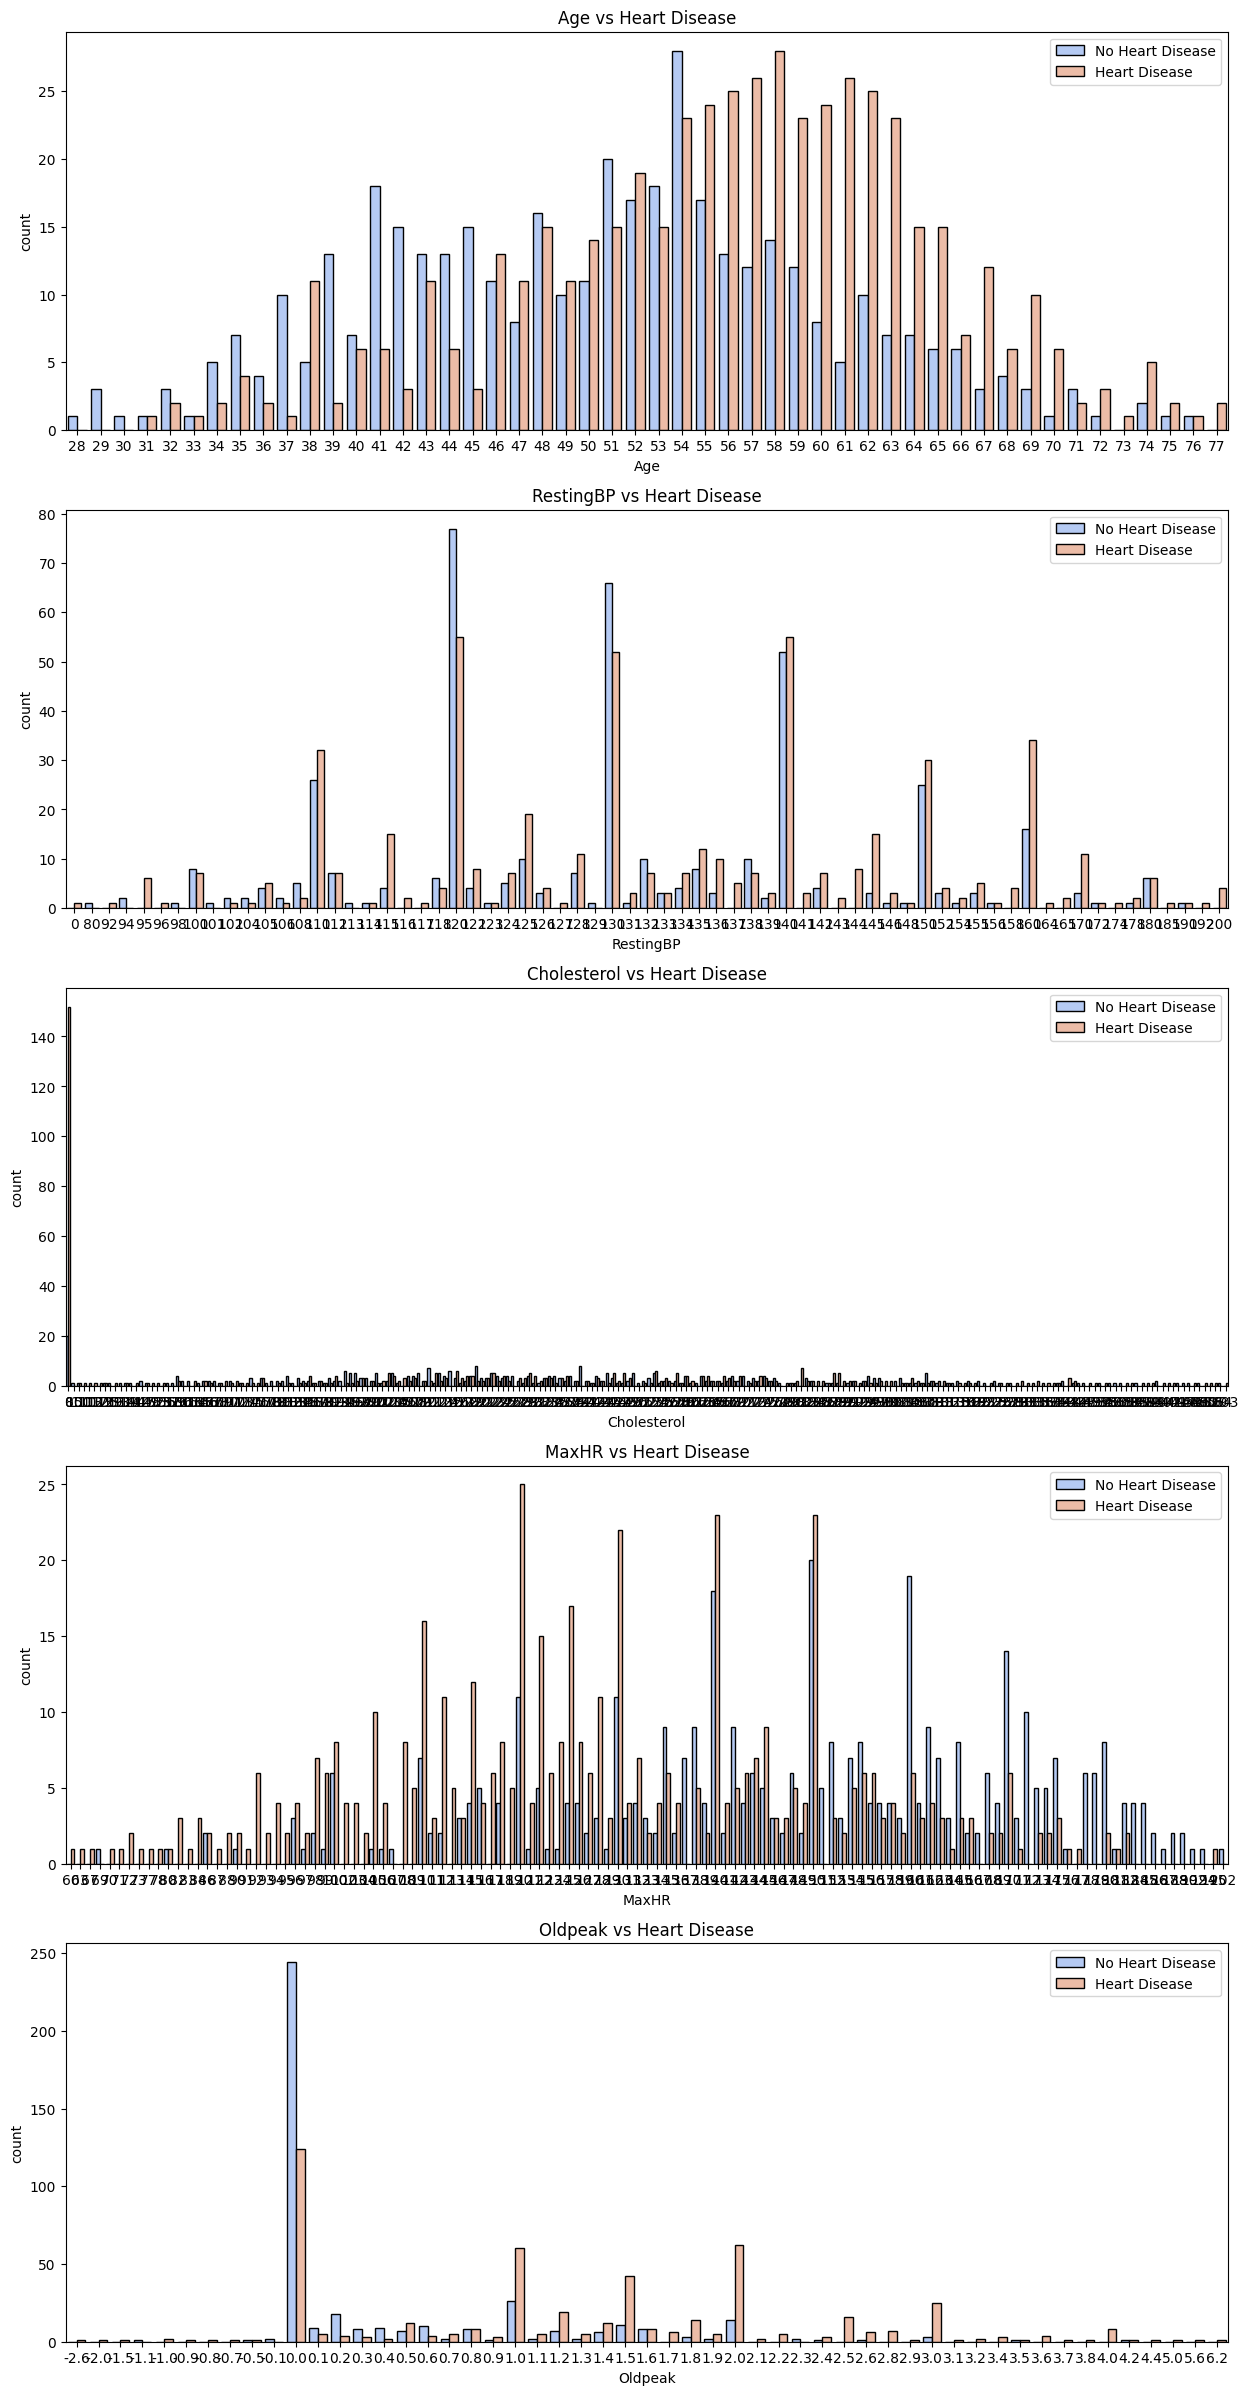

In [17]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x= numerical_features[i],data = df,hue = "HeartDisease",palette = 'coolwarm', edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

- It is difficult to discern anything from this. We can possibly learn more about the data by aggregating numerical data into range-based categorical variables if needed. 

## 3. Data Wrangling Tasks

In [17]:
## Scale Data for usage. This consists of normalization and standaradization and performed based 
## on EDA observations on variables

from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


### Correlation Matrix

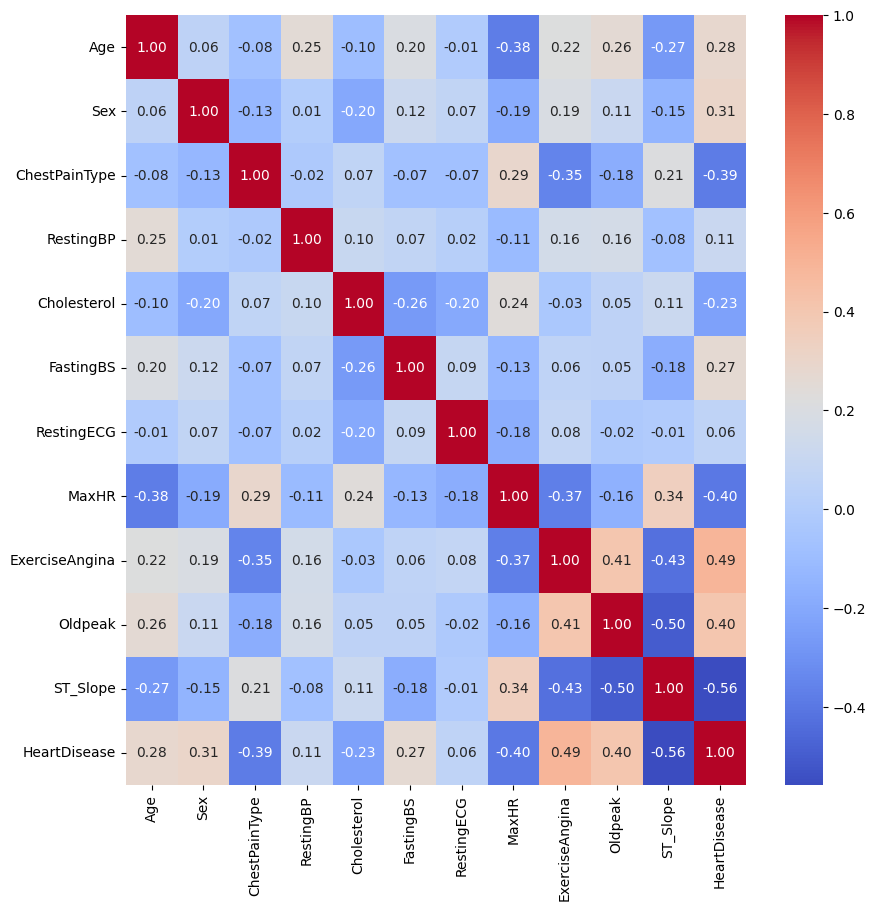

In [34]:
plt.figure(figsize = (10, 10))
labels = ['Age', 'Sex', 'ChestPainT', 'RestingBP', 
                       'Cholesterol', 'FastBS', 'RestECG', 'MaxHR', 'ExerciseAng', 'Oldpeak', 'ST_Slope', 'HD']
s= sns.heatmap(df1.corr(),cmap = 'coolwarm',annot = True, fmt='.2f');
# s.set_xlabel(labels, fontsize=10)
# s.set_ylabel(labels, fontsize=10)

plt.savefig('correlation.pdf')

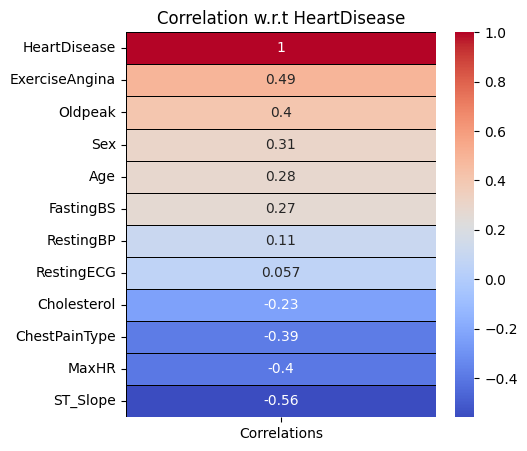

In [20]:
## Matrix only with respect to HD outcome
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

- RestingBP and RestingECG is relative 0 correlation w/ HD outcomes

### Feature Selection for Categorical Features

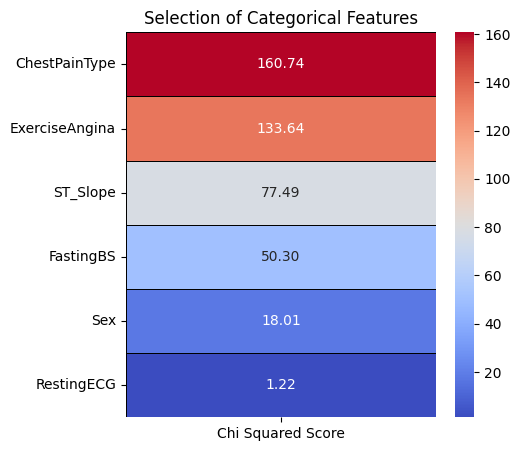

In [21]:
### Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- RestingECG does not seem to be important for HD prediction due to low Chi-Square Score

### Feature Selection for Numerical Features

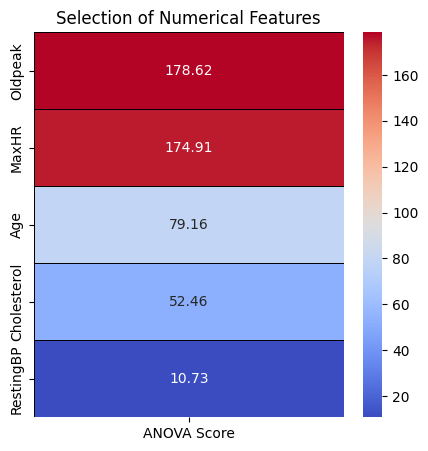

In [22]:
### Perform ANOVA Test

from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- ANOVA Test shows that we should drop the RestingBP feature from numerical components. Thus at the end of feature analysis, we decide to drop RestingBP and RestingECG

## 4. Model Development

#### Models to be Developed:
1. Logistic Regression
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. K-Nearest Neighbors Classifier
6. Naive Bayes Classifier
7. XGBoost Classifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [19]:
## Separate x and y values, also split train and test 80-20
x = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
y = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle=True, random_state = 39)

In [20]:
#Evaluation Function
def model_eval(classifier, pred_result):
    print('Results:\n')
    print("Training accuracy: ",classifier.score(x_train,y_train))
    
    #Test Accuracy
    acc_score = accuracy_score(y_test, pred_result)
    print('Testing accuracy: ',acc_score)
    
    #ROC Score
    roc_auc = roc_auc_score(np.array(y_test), pred_result)
    print('ROC AUC score: ',roc_auc)
    #ROC Curve
    RocCurveDisplay.from_estimator(classifier, x_train,y_train)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
    
    #Build Confusion Matrix
    conf_mat = confusion_matrix(y_test, pred_result)
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in conf_mat.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in conf_mat.flatten()/np.sum(conf_mat)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_mat,annot = labels,cmap = 'coolwarm',fmt ='')
    
    #Classification Report
    class_rep2 = classification_report(y_test,pred_result)
    print('Classification Report: \n',class_rep2)
    

### Logistic Regression (Baseline, Optimized via in-built method)

In [26]:
from sklearn.linear_model import LogisticRegressionCV
#default
lr = LogisticRegressionCV()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)

Results:

Training accuracy:  0.8678474114441417
Testing accuracy:  0.8260869565217391
ROC AUC score:  0.8158653846153847


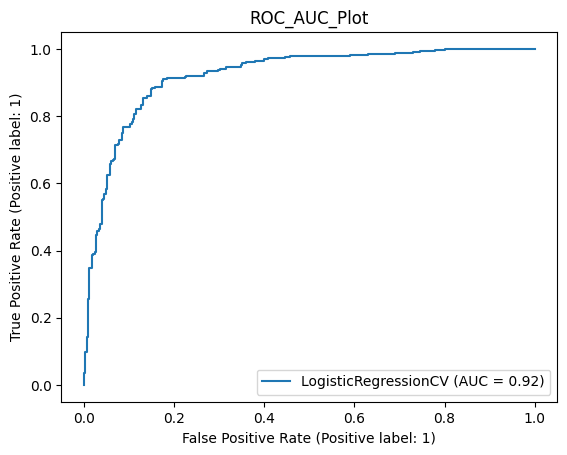

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.74      0.79        80
           1       0.82      0.89      0.85       104

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184



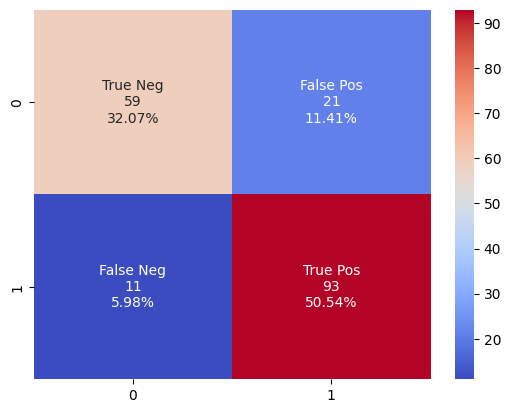

In [27]:
model_eval(lr, pred_lr)

### Support Vector Classifier (SVM) (OPTIMIZED)

In [28]:
from sklearn.svm import SVC

#Default
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

In [29]:
#Set Hyperparameter values for GridSearch
C = list(range(0, 5))
kernel= ["linear", "poly", "rbf", "sigmoid"]
gamma = ["scale", "auto"]

#Creating a dictionary for the hyper parameters
hyperSVC = dict(C=C, kernel=kernel, gamma=gamma)

#Applying GridSearchCV to get the best value for hyperparameters
gridSVC = GridSearchCV(svc, hyperSVC, cv = 5, verbose = 1, n_jobs = -1)
bestSVC = gridSVC.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [30]:
print('The best hyper parameters are:\n',gridSVC.best_params_)

The best hyper parameters are:
 {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [31]:
optimizedSVC = SVC(C=2, gamma='auto', kernel='rbf')
optimizedSVC.fit(x_train, y_train)
predSVC = optimizedSVC.predict(x_test)

Results:

Training accuracy:  0.8814713896457765
Testing accuracy:  0.8532608695652174
ROC AUC score:  0.8399038461538463


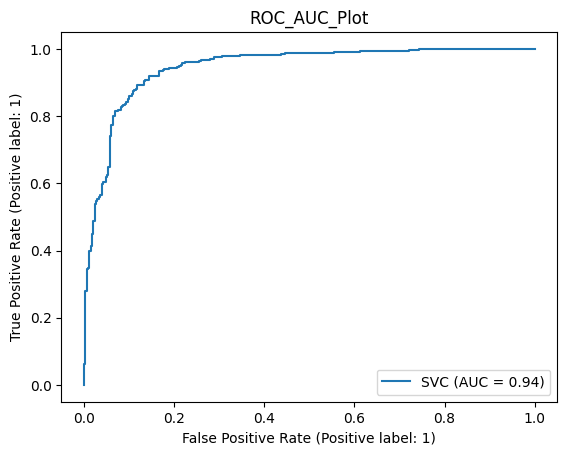

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.74      0.81        80
           1       0.82      0.94      0.88       104

    accuracy                           0.85       184
   macro avg       0.87      0.84      0.85       184
weighted avg       0.86      0.85      0.85       184



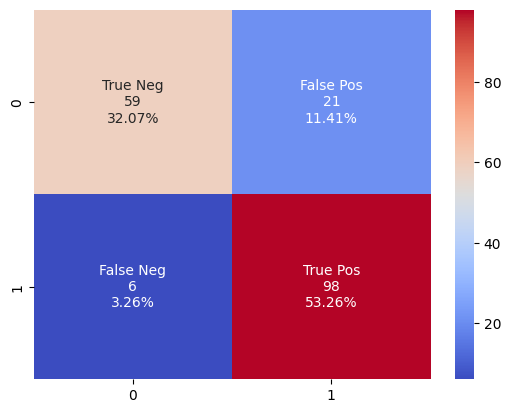

In [32]:
model_eval(optimizedSVC, predSVC)

### Decision Tree Classifier (Optimized)

In [39]:
from sklearn.tree import DecisionTreeClassifier

#Default
dt_class = DecisionTreeClassifier()
dt_class.fit(x_train, y_train)
dt_pred = dt_class.predict(x_test)

In [41]:
#Set Hyperparameter values for GridSearch
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyperDT = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridDT = GridSearchCV(dt_class, hyperDT, cv = 5, verbose = 1, n_jobs = -1)
bestDT = gridDT.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [42]:
print('The best hyper parameters are:\n',gridDT.best_params_)

The best hyper parameters are:
 {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 15}


In [35]:
#Optimized DT
optimizedDT = DecisionTreeClassifier(max_depth= 30, max_features= 5, min_samples_leaf= 10, min_samples_split= 10)
optimizedDT.fit(x_train, y_train)
predDT = optimizedDT.predict(x_test)

Results:

Training accuracy:  0.8705722070844687
Testing accuracy:  0.842391304347826
ROC AUC score:  0.8302884615384616


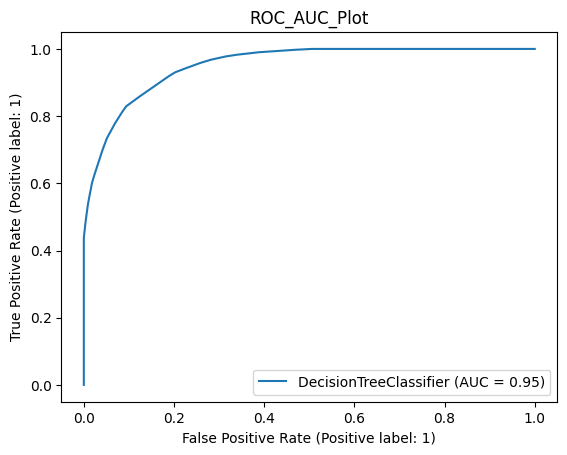

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        80
           1       0.82      0.92      0.87       104

    accuracy                           0.84       184
   macro avg       0.85      0.83      0.84       184
weighted avg       0.85      0.84      0.84       184



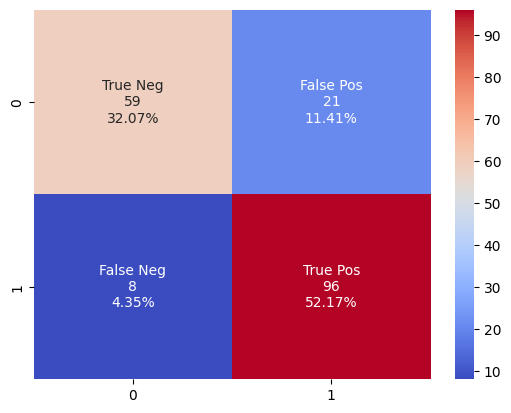

In [36]:
model_eval(optimizedDT, predDT)

### Random Forest Classifier (Optimized)

In [37]:
from sklearn.ensemble import RandomForestClassifier
#Default Setup
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

In [39]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

#Applying GridSearchCV to get the best value for hyperparameters
gridrf = GridSearchCV(rf, hyper_rf, cv = 5, verbose = 1, n_jobs = -1)
bestrf = gridrf.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


In [40]:
print('The best hyper parameters are:\n',gridrf.best_params_)

The best hyper parameters are:
 {'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [41]:
optimizedRF = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=100)
optimizedRF.fit(x_train, y_train)
pred_rf = optimizedRF.predict(x_test)

Results:

Training accuracy:  0.8978201634877384
Testing accuracy:  0.8695652173913043
ROC AUC score:  0.8586538461538462


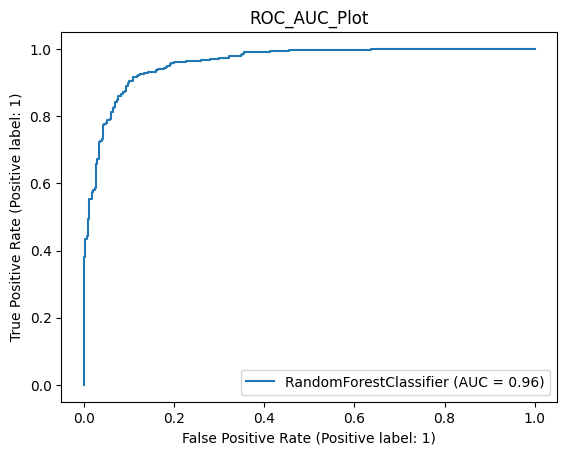

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        80
           1       0.84      0.94      0.89       104

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



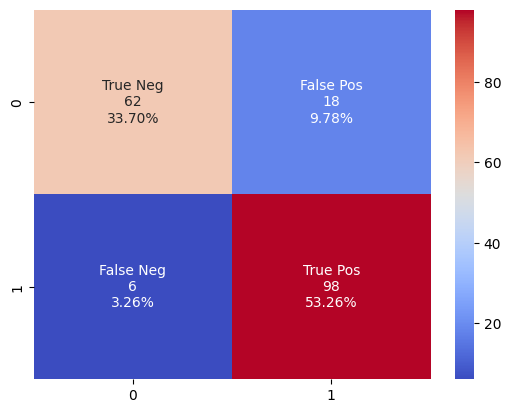

In [42]:
model_eval(optimizedRF, pred_rf)

### KNN Classifier (Optimized)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

In [44]:
#Setting values for the parameters
leaf_size=list(range(1,10))
n_neighbors = list(range(1,5))
p=[1,2]

#Creating a dictionary for the hyper parameters
hyper_knn = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Applying GridSearchCV to get the best value for hyperparameters
grid_knn = GridSearchCV(knn, hyper_knn, cv = 5, verbose = 1, n_jobs = -1)
best_knn = grid_knn.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [45]:
print('The best hyper parameters are:\n',grid_knn.best_params_)

The best hyper parameters are:
 {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}


In [46]:
optimizedKNN = KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)
optimizedKNN.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

Results:

Training accuracy:  0.9032697547683923
Testing accuracy:  0.842391304347826
ROC AUC score:  0.8346153846153846


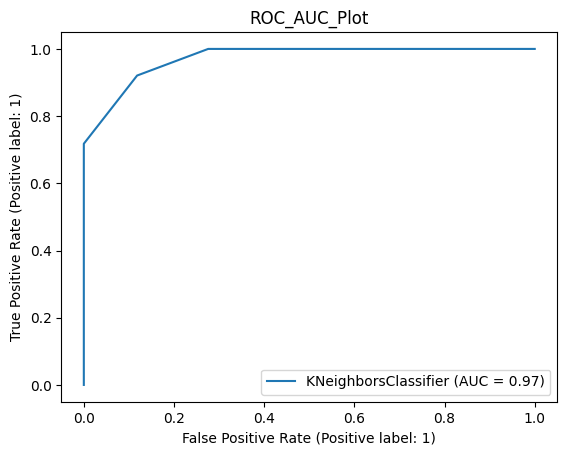

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81        80
           1       0.84      0.89      0.87       104

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



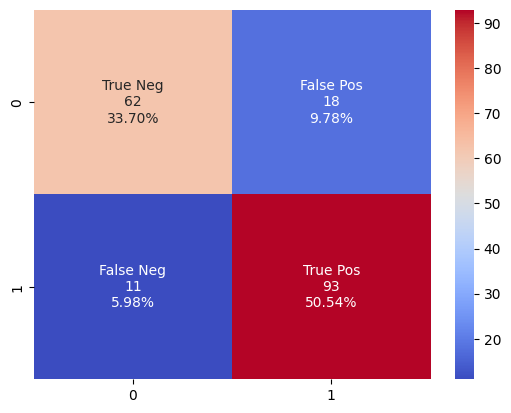

In [47]:
model_eval(optimizedKNN, pred_knn)

### Naive Bayes (Optimized)

In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
pred_nb = nb.predict(x_test)

In [49]:
#Setting values for the parameters
var_smoothing= np.logspace(0,-9, num=100)

#Creating a dictionary for the hyper parameters
hyper_nb = dict(var_smoothing=var_smoothing)

#Applying GridSearchCV to get the best value for hyperparameters
grid_nb = GridSearchCV(nb, hyper_nb, cv = 10, verbose = 1, n_jobs = -1)
best_nb = grid_nb.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [50]:
print('The best hyper parameters are:\n',grid_nb.best_params_)

The best hyper parameters are:
 {'var_smoothing': 0.0001232846739442066}


Results:

Training accuracy:  0.8555858310626703
Testing accuracy:  0.8369565217391305
ROC AUC score:  0.8283653846153844


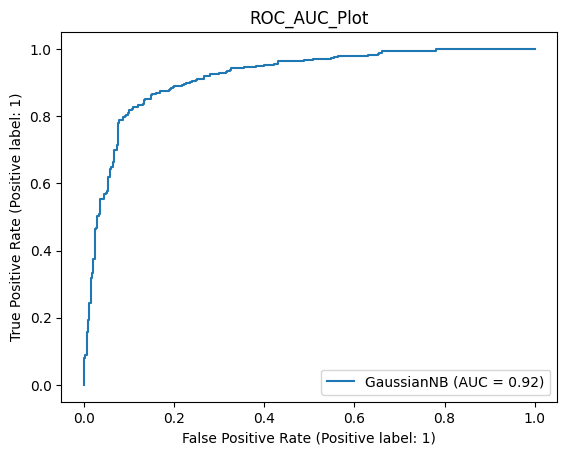

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        80
           1       0.83      0.89      0.86       104

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



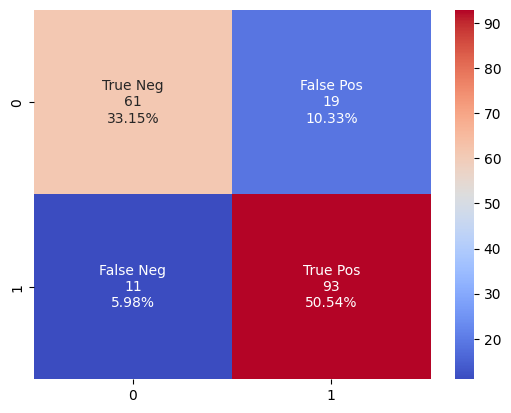

In [51]:
nb_best = GaussianNB(var_smoothing= 0.0001232846739442066)
nb_best.fit(x_train, y_train)
pred_nb = nb_best.predict(x_test)
model_eval(nb_best, pred_nb)

### XGBoost (NEED TO RUN AND EVAL)

In [52]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)
pred_xg = xg.predict(x_test)

In [26]:
#Setting values for the parameters
n_estimators = list(range(1,20))
max_depth = list(range(1,10))
learning_rate = [.1,.4, .45, .5, .55, .6]
colsample_bytree = [.6, .7, .8, .9, 1]
booster = ["gbtree"]
min_child_weight= [0.001,0.003,0.01]

#Creating a dictionary for the hyper parameters
hyper_xg = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
                colsample_bytree=colsample_bytree, booster=booster, min_child_weight=min_child_weight)

#Applying GridSearchCV to get the best value for hyperparameters
grid_xg = GridSearchCV(xg, hyper_xg, cv = 10, verbose = 1, n_jobs = -1)
best_xg = grid_xg.fit(x_train, y_train)

Fitting 10 folds for each of 15390 candidates, totalling 153900 fits


In [27]:
print('The best hyper parameters are:\n',grid_xg.best_params_)

The best hyper parameters are:
 {'booster': 'gbtree', 'colsample_bytree': 0.7, 'learning_rate': 0.4, 'max_depth': 4, 'min_child_weight': 0.001, 'n_estimators': 14}


In [28]:
optimizedXG = xgb.XGBClassifier(booster='gbtree', colsample_bytree=0.7, 
                                learning_rate=0.4, min_child_weight=0.001, n_estimators=14)
optimizedXG.fit(x_train, y_train)
pred_XG = optimizedXG.predict(x_test)

Results:

Training accuracy:  0.9754768392370572
Testing accuracy:  0.8858695652173914
ROC AUC score:  0.8802884615384616


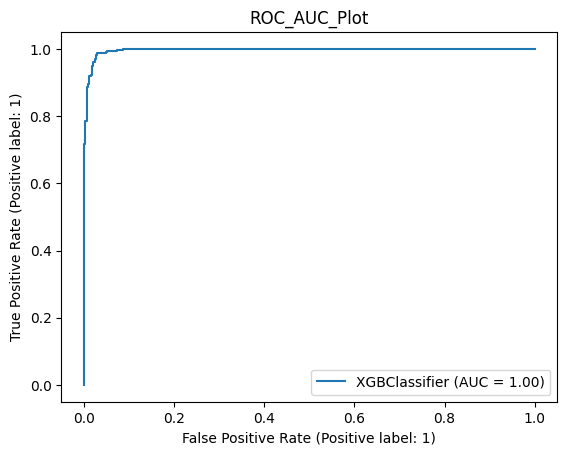

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        80
           1       0.88      0.92      0.90       104

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



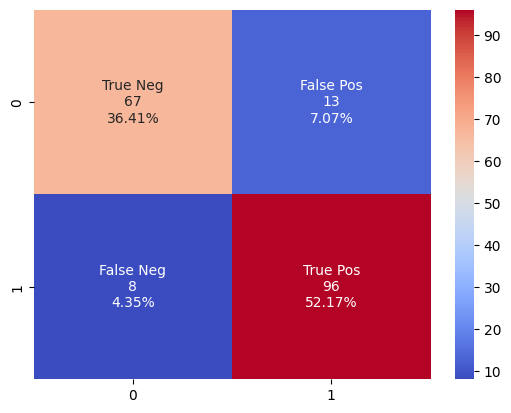

In [29]:
model_eval(optimizedXG, pred_XG)

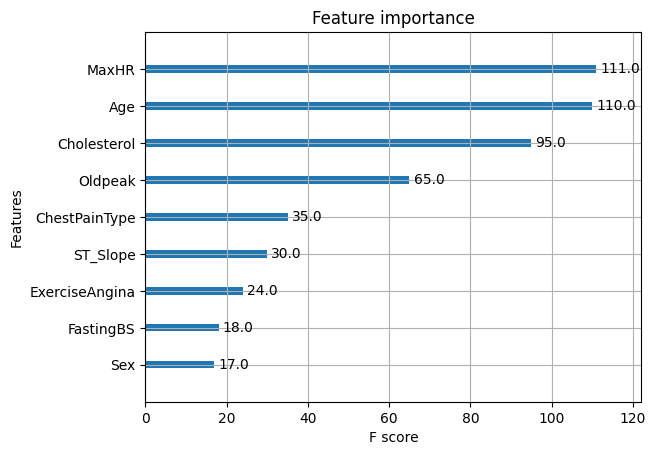

In [59]:
# Determine Feature Importance in XGBoost
from xgboost import plot_importance
optimizedXG.feature_importances_ 
optimizedXG.get_booster().feature_names = df1.columns.drop(['HeartDisease','RestingBP','RestingECG']).tolist()

xgb.plot_importance(optimizedXG)

plt.savefig("xgboostimp.pdf")

# colNames = df1.columns.drop(['HeartDisease','RestingBP','RestingECG']).tolist()
# colNames